In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [2]:
# Read the csv file into a pandas DataFrame

smoking = pd.read_csv('../Resources/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [4]:
data = smoking.copy()

In [5]:
# Use Pandas get_dummies to convert categorical data

# YOUR CODE HERE
smoking_binary = pd.get_dummies(data)
smoking_binary

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1
...,...,...,...,...,...,...,...,...
649,73041,16,4.270,67.0,0,1,1,0
650,73042,15,3.727,68.0,0,1,1,0
651,73751,18,2.853,60.0,1,0,0,1
652,75852,16,2.795,63.0,1,0,1,0


In [6]:
# Drop extra dummy columns

# YOUR CODE HERE
smoking_binary.drop(["Sex_Female", "Smoker_Non"], axis=1)

,Id,Age,FEV,Height,Sex_Male,Smoker_Current
0,301,9,1.708,57.0,0,0
1,451,8,1.724,67.5,0,0
2,501,7,1.720,54.5,0,0
3,642,9,1.558,53.0,1,0
4,901,9,1.895,57.0,1,0
...,...,...,...,...,...,...
649,73041,16,4.270,67.0,1,1
650,73042,15,3.727,68.0,1,1
651,73751,18,2.853,60.0,0,0
652,75852,16,2.795,63.0,0,1


In [8]:
# Assign X (data) and y (target)

# YOUR CODE HERE
y = smoking_binary['FEV'].values.reshape(-1,1)
X = smoking_binary[['Age', 'Height', 'Sex_Male', 'Smoker_Current']]

# Check dimension:
print(f"X dimension: {X.shape}")
print(f"y dimension: {y.shape}")

X dimension: (654, 4)
y dimension: (654, 1)


In [10]:
# Split the data into training and testing

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9)
# split train-validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.75)

# check size and dimension
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {X_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (441, 4), (441, 1)
Validation set: (147, 4), (147, 4)
Test set: (66, 4), (66, 1)


In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

# YOUR CODE HERE

# create StandardScaler model on the TRAINING set only
# Reason: the model will be trained on this train set; 
# Therefore, all other sets (val and test) are need to be scaled as the training set

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
# Transform the training and testing data using the X_scaler and y_scaler models

# YOUR CODE HERE

# transform training set
X_train_scaled = X_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

# transform val set
X_val_scaled = X_scaler.transform(X_val)
y_val_scaled = y_scaler.transform(y_val)

# and, same for test
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

# show some sample and difference:
print(f"X set and scaled X set dimension: {X_train.shape}, {X_train_scaled.shape}")
print(f"X's first values and X's first scaled value: {X_train.head(1)}, {X_train_scaled[0]} ")

X set and scaled X set dimension: (441, 4), (441, 4)
X's first values and X's first scaled value:      Age  Height  Sex_Male  Smoker_Current
195    8    62.5         0               0, [-0.63091217  0.27129091 -0.99773499 -0.31583322] 


In [25]:
# Create a LinearRegression model and fit it to the scaled training data

# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [26]:
# Optional, but necesary:
# Validate the model after fiting into training set
# after checking the scores, and there are huge 'discrepancy',
# we should make adjustment to the model's hyperparameters

r2_train = LR_model.score(X_train_scaled, y_train_scaled)
r2_val = LR_model.score(X_val_scaled, y_val_scaled)

print(f"R-squared for training: {r2_train}")
print(f"R-squared for validation: {r2_val}")

R-squared for training: 0.7572557953535027
R-squared for validation: 0.8124239960118784


In [28]:
# Since there is not much of difference in those 2 score,
# combine training and validation sets into 1 set, re-train the model, re-check r-squared score

X_final_train_scale = np.concatenate((X_train_scaled, X_val_scaled))
y_final_train_scale = np.concatenate((y_train_scaled, y_val_scaled))

# retrain model:
LR_model = LinearRegression()

LR_model.fit(X_final_train_scale, y_final_train_scale)

LinearRegression()

In [29]:
# re-check r-squared score

r2_train_final = LR_model.score(X_final_train_scale, y_final_train_scale)
print(f"R-squared for training: {r2_train_final}")

R-squared for training: 0.7720499923855859


Text(0, 0.5, 'Standardized Residual')

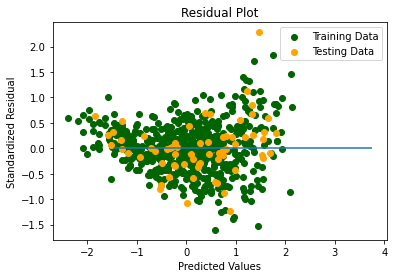

In [31]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

# YOUR CODE HERE
# predition based on training set
train_prediction = LR_model.predict(X_final_train_scale)

# prediction baed on test set
test_prediction = LR_model.predict(X_test_scaled)

plt.scatter(train_prediction , y_final_train_scale - train_prediction, 
           c="darkgreen", label='Training Data')
plt.scatter(test_prediction , y_test_scaled - test_prediction, 
           c="orange", label='Testing Data')

# Chart's elements
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.legend()
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residual")

In [36]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# YOUR CODE HERE
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test_scaled, LR_model.predict(X_test_scaled))
r2 = LR_model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.27661197466500104, R2: 0.788375695954169


### Reading Metrics from Linear Regression model
  1. MSE is low (close to 0): predicted results are not so different with actual observations. Good indication
  2. R-squared = 0.79, close to 1, meaning: the majority of variance in y is explainable by X. Good indication

In [45]:
print('Weight coefficients: ', LR_model.coef_)
print('y-axis intercept: ', LR_model.intercept_) 

Weight coefficients:  [[ 0.22257509  0.68235904  0.09430734 -0.01887444]]
y-axis intercept:  [0.01837444]


###### Our Linear Regression equation looks like this:

$y = 0.01837444 + 0.22257509x_1$ + 0.68235904$x_2$ + 0.09430734$x_3$ - 0.01887444$x_4$

* $y$ : FEV (forced expiratory volume)
* $x_1$ : age
* $x_2$ : height
* $x_3$ : is Male (1= male, 0 = female)
* $x_4$ : is current smoker (1 = current smoker, 0 = non-smoker)

###### Interpretation:
FEV (forced expiratory volume): index of pulmonary function that measures the volume of air expelled after one second of constant effort.

With this Regression Model, we can predict the FEV index of an individual based on few data of age, height, gender, and smoker status:
* Age and heigt have positive relation with FEV
* Male gender tend to have higher FEV than female
* Current-smoker status will lower FEV

Keep in mind that the model is trained with scaled data, therefore prediction result is also scaled
To get real predicted FEV value, we would need to inversed the scaling with this mathematic formula:

$y_o$ = ($y_p$ * $\sigma$) + $\mu$
* $y_o$: actual prediction of FEV value 
* $y_p$: scaled prediction of FEV value
* $\sigma$ : sample standard deviation of FEV data
* $\mu$: sample mean of FEV data

## EXTRA: training different type of Linear models: LASSO, Ridge and ElasticNet

In [38]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

# YOUR CODE HERE
lasso = Lasso(alpha=.01).fit(X_final_train_scale, y_final_train_scale)

MSE = mean_squared_error(y_test_scaled, lasso.predict(X_test_scaled))
r2 = lasso.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.28159900592462395, R2: 0.7845603259910622


In [40]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

# YOUR CODE HERE
ridge = Ridge(alpha=.01).fit(X_final_train_scale, y_final_train_scale)

MSE = mean_squared_error(y_test_scaled, ridge.predict(X_test_scaled))
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.27661431890278654, R2: 0.7883739024754504


In [42]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

# YOUR CODE HERE
elasticnet = ElasticNet(alpha=.01).fit(X_final_train_scale, y_final_train_scale)

MSE = mean_squared_error(y_test_scaled, elasticnet.predict(X_test_scaled))
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.27972135581986357, R2: 0.7859968379032551


###### Observations:
LASSO, Ridge and ElasticNet also perform as well as Linear Regression.

MSE and R-square score of all 4 linear models are very similar